In [1]:
import torch
from torch import optim
from tqdm import tqdm

import numpy as np
import copy
import json

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
USE_CUDA = True
use_device = torch.device('cuda' if USE_CUDA else 'cpu')

In [2]:
from data_util import Schema

root = '/notebooks/sinica/dataset/'

schema_root = root+'schema_mr5.txt'
relation_data = root+'skincare_mr5.train'
dev_data = root+'skincare_mr5.dev'
test_data = root+'skincare_mr5.test'

word_to_ix = '/notebooks/sinica/code/word_to_ix.pkl'


schema = Schema(schema_root)
# schema.rel2ix
# {'ApplyIn': 4,'ApplyTo': 2, 'ApprovedOf': 6, 'Feel': 3, 'Rel-None': 1, 'Rel-Pad': 0, 'Relieve': 5}

In [3]:
# ========hyper-parameter-set==========
MAX_LEN = 100
BATCH_SIZE = 32

EMBEDDING_DIM = 64
HIDDEN_DIM1 = 100  #30
HIDDEN_DIM2 =  100 #16
LABEL_EMBED_DIM = 100 #8

ATTN_OUT = 100 #8

n_iter = 50
rel_be_filtered=None
# rel_be_filtered=['Relieve']

In [4]:
from data_util import BIOLoader

loader = BIOLoader(relation_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                   word_to_ix=word_to_ix, shuffle=True, device=use_device)
dev_loader = BIOLoader(dev_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                       word_to_ix=loader.word_to_ix, device=use_device)

In [5]:
from models import JointERE


param_list = [loader.vocab_size, EMBEDDING_DIM, HIDDEN_DIM1, HIDDEN_DIM2, LABEL_EMBED_DIM,
             ATTN_OUT, schema]


model = JointERE(*param_list).to(use_device)
model.fit(loader, dev_loader, n_iter=n_iter)


  2%|▏         | 1/50 [00:26<21:36, 26.46s/it]

epoch: 1 | ent loss 0.1627 | rel loss 0.0084 | total loss 0.1712
         | val ent loss 0.1480 | val rel loss 0.0019


  4%|▍         | 2/50 [00:53<21:31, 26.90s/it]

epoch: 2 | ent loss 0.0650 | rel loss 0.0079 | total loss 0.0729
         | val ent loss 0.1084 | val rel loss 0.0014


  6%|▌         | 3/50 [01:21<21:10, 27.04s/it]

epoch: 3 | ent loss 0.0524 | rel loss 0.0046 | total loss 0.0570
         | val ent loss 0.0762 | val rel loss 0.0026


  8%|▊         | 4/50 [01:49<20:56, 27.31s/it]

epoch: 4 | ent loss 0.0691 | rel loss 0.0028 | total loss 0.0719
         | val ent loss 0.0399 | val rel loss 0.0007


 10%|█         | 5/50 [02:16<20:29, 27.33s/it]

epoch: 5 | ent loss 0.0673 | rel loss 0.0035 | total loss 0.0709
         | val ent loss 0.0635 | val rel loss 0.0010


 12%|█▏        | 6/50 [02:44<20:04, 27.37s/it]

epoch: 6 | ent loss 0.0588 | rel loss 0.0046 | total loss 0.0634
         | val ent loss 0.0730 | val rel loss 0.0010


 14%|█▍        | 7/50 [03:11<19:38, 27.40s/it]

epoch: 7 | ent loss 0.0716 | rel loss 0.0032 | total loss 0.0748
         | val ent loss 0.0105 | val rel loss 0.0008


 16%|█▌        | 8/50 [03:38<19:05, 27.27s/it]

epoch: 8 | ent loss 0.0546 | rel loss 0.0050 | total loss 0.0596
         | val ent loss 0.0132 | val rel loss 0.0010


 18%|█▊        | 9/50 [04:04<18:34, 27.19s/it]

epoch: 9 | ent loss 0.0383 | rel loss 0.0042 | total loss 0.0425
         | val ent loss 0.0769 | val rel loss 0.0038


 20%|██        | 10/50 [04:30<18:02, 27.05s/it]

epoch: 10 | ent loss 0.0385 | rel loss 0.0033 | total loss 0.0419
          | val ent loss 0.0514 | val rel loss 0.0009


 22%|██▏       | 11/50 [04:56<17:30, 26.92s/it]

epoch: 11 | ent loss 0.0394 | rel loss 0.0026 | total loss 0.0420
          | val ent loss 0.0874 | val rel loss 0.0006


 24%|██▍       | 12/50 [05:22<17:00, 26.86s/it]

epoch: 12 | ent loss 0.0423 | rel loss 0.0036 | total loss 0.0459
          | val ent loss 0.0634 | val rel loss 0.0008


 26%|██▌       | 13/50 [05:47<16:30, 26.76s/it]

epoch: 13 | ent loss 0.0794 | rel loss 0.0061 | total loss 0.0855
          | val ent loss 0.0778 | val rel loss 0.0012


 28%|██▊       | 14/50 [06:13<16:01, 26.71s/it]

epoch: 14 | ent loss 0.0670 | rel loss 0.0048 | total loss 0.0718
          | val ent loss 0.0125 | val rel loss 0.0005


 30%|███       | 15/50 [06:40<15:34, 26.70s/it]

epoch: 15 | ent loss 0.0291 | rel loss 0.0039 | total loss 0.0330
          | val ent loss 0.0272 | val rel loss 0.0007


 32%|███▏      | 16/50 [07:06<15:06, 26.65s/it]

epoch: 16 | ent loss 0.0607 | rel loss 0.0030 | total loss 0.0637
          | val ent loss 0.0336 | val rel loss 0.0005


 34%|███▍      | 17/50 [07:32<14:37, 26.59s/it]

epoch: 17 | ent loss 0.0604 | rel loss 0.0028 | total loss 0.0632
          | val ent loss 0.0297 | val rel loss 0.0009


 36%|███▌      | 18/50 [07:58<14:09, 26.56s/it]

epoch: 18 | ent loss 0.0459 | rel loss 0.0048 | total loss 0.0507
          | val ent loss 0.0239 | val rel loss 0.0009


 38%|███▊      | 19/50 [08:24<13:43, 26.57s/it]

epoch: 19 | ent loss 0.0355 | rel loss 0.0051 | total loss 0.0406
          | val ent loss 0.0269 | val rel loss 0.0025


 40%|████      | 20/50 [08:50<13:16, 26.54s/it]

epoch: 20 | ent loss 0.0418 | rel loss 0.0049 | total loss 0.0467
          | val ent loss 0.0201 | val rel loss 0.0014


 42%|████▏     | 21/50 [09:17<12:49, 26.54s/it]

epoch: 21 | ent loss 0.0432 | rel loss 0.0050 | total loss 0.0482
          | val ent loss 0.0471 | val rel loss 0.0008


 44%|████▍     | 22/50 [09:43<12:22, 26.52s/it]

epoch: 22 | ent loss 0.0551 | rel loss 0.0023 | total loss 0.0574
          | val ent loss 0.0200 | val rel loss 0.0008


 46%|████▌     | 23/50 [10:09<11:56, 26.52s/it]

epoch: 23 | ent loss 0.0347 | rel loss 0.0046 | total loss 0.0394
          | val ent loss 0.0300 | val rel loss 0.0007


 48%|████▊     | 24/50 [10:35<11:28, 26.48s/it]

epoch: 24 | ent loss 0.0223 | rel loss 0.0040 | total loss 0.0263
          | val ent loss 0.0075 | val rel loss 0.0010


 50%|█████     | 25/50 [11:02<11:02, 26.49s/it]

epoch: 25 | ent loss 0.0289 | rel loss 0.0033 | total loss 0.0322
          | val ent loss 0.0166 | val rel loss 0.0005


 52%|█████▏    | 26/50 [11:28<10:35, 26.49s/it]

epoch: 26 | ent loss 0.0483 | rel loss 0.0034 | total loss 0.0516
          | val ent loss 0.0098 | val rel loss 0.0017


 54%|█████▍    | 27/50 [11:55<10:09, 26.49s/it]

epoch: 27 | ent loss 0.0511 | rel loss 0.0033 | total loss 0.0544
          | val ent loss 0.0196 | val rel loss 0.0009


 56%|█████▌    | 28/50 [12:22<09:43, 26.50s/it]

epoch: 28 | ent loss 0.0472 | rel loss 0.0045 | total loss 0.0518
          | val ent loss 0.0196 | val rel loss 0.0003


 58%|█████▊    | 29/50 [12:49<09:16, 26.52s/it]

epoch: 29 | ent loss 0.0526 | rel loss 0.0033 | total loss 0.0558
          | val ent loss 0.0301 | val rel loss 0.0015


 60%|██████    | 30/50 [13:14<08:49, 26.50s/it]

epoch: 30 | ent loss 0.0363 | rel loss 0.0039 | total loss 0.0402
          | val ent loss 0.0183 | val rel loss 0.0007


 62%|██████▏   | 31/50 [13:42<08:23, 26.52s/it]

epoch: 31 | ent loss 0.0180 | rel loss 0.0032 | total loss 0.0212
          | val ent loss 0.0490 | val rel loss 0.0007


 64%|██████▍   | 32/50 [14:09<07:57, 26.54s/it]

epoch: 32 | ent loss 0.0272 | rel loss 0.0039 | total loss 0.0311
          | val ent loss 0.0422 | val rel loss 0.0005


 66%|██████▌   | 33/50 [14:35<07:31, 26.54s/it]

epoch: 33 | ent loss 0.0180 | rel loss 0.0026 | total loss 0.0206
          | val ent loss 0.0216 | val rel loss 0.0010


 68%|██████▊   | 34/50 [15:02<07:04, 26.53s/it]

epoch: 34 | ent loss 0.0502 | rel loss 0.0054 | total loss 0.0556
          | val ent loss 0.0103 | val rel loss 0.0008


 70%|███████   | 35/50 [15:28<06:37, 26.53s/it]

epoch: 35 | ent loss 0.0300 | rel loss 0.0059 | total loss 0.0359
          | val ent loss 0.0340 | val rel loss 0.0003


 72%|███████▏  | 36/50 [15:54<06:11, 26.52s/it]

epoch: 36 | ent loss 0.0721 | rel loss 0.0029 | total loss 0.0750
          | val ent loss 0.0092 | val rel loss 0.0007


 74%|███████▍  | 37/50 [16:20<05:44, 26.50s/it]

epoch: 37 | ent loss 0.0218 | rel loss 0.0026 | total loss 0.0244
          | val ent loss 0.0066 | val rel loss 0.0007


 76%|███████▌  | 38/50 [16:46<05:17, 26.49s/it]

epoch: 38 | ent loss 0.0218 | rel loss 0.0027 | total loss 0.0246
          | val ent loss 0.0223 | val rel loss 0.0006


 78%|███████▊  | 39/50 [17:13<04:51, 26.50s/it]

epoch: 39 | ent loss 0.0428 | rel loss 0.0035 | total loss 0.0464
          | val ent loss 0.0154 | val rel loss 0.0008


 80%|████████  | 40/50 [17:39<04:24, 26.49s/it]

epoch: 40 | ent loss 0.0713 | rel loss 0.0055 | total loss 0.0768
          | val ent loss 0.0356 | val rel loss 0.0010


 82%|████████▏ | 41/50 [18:06<03:58, 26.49s/it]

epoch: 41 | ent loss 0.0258 | rel loss 0.0029 | total loss 0.0287
          | val ent loss 0.0309 | val rel loss 0.0007


 84%|████████▍ | 42/50 [18:32<03:31, 26.48s/it]

epoch: 42 | ent loss 0.0221 | rel loss 0.0027 | total loss 0.0247
          | val ent loss 0.0090 | val rel loss 0.0006


 86%|████████▌ | 43/50 [18:59<03:05, 26.49s/it]

epoch: 43 | ent loss 0.0227 | rel loss 0.0048 | total loss 0.0275
          | val ent loss 0.0272 | val rel loss 0.0016


 88%|████████▊ | 44/50 [19:25<02:38, 26.48s/it]

epoch: 44 | ent loss 0.0302 | rel loss 0.0046 | total loss 0.0349
          | val ent loss 0.0097 | val rel loss 0.0007


 90%|█████████ | 45/50 [19:50<02:12, 26.46s/it]

epoch: 45 | ent loss 0.0852 | rel loss 0.0051 | total loss 0.0902
          | val ent loss 0.0452 | val rel loss 0.0011


 92%|█████████▏| 46/50 [20:16<01:45, 26.45s/it]

epoch: 46 | ent loss 0.0150 | rel loss 0.0026 | total loss 0.0176
          | val ent loss 0.0102 | val rel loss 0.0005


 94%|█████████▍| 47/50 [20:43<01:19, 26.45s/it]

epoch: 47 | ent loss 0.0210 | rel loss 0.0040 | total loss 0.0250
          | val ent loss 0.0062 | val rel loss 0.0004


 96%|█████████▌| 48/50 [21:09<00:52, 26.45s/it]

epoch: 48 | ent loss 0.0338 | rel loss 0.0022 | total loss 0.0360
          | val ent loss 0.0150 | val rel loss 0.0005


 98%|█████████▊| 49/50 [21:34<00:26, 26.42s/it]

epoch: 49 | ent loss 0.0646 | rel loss 0.0037 | total loss 0.0683
          | val ent loss 0.0254 | val rel loss 0.0006


100%|██████████| 50/50 [21:58<00:00, 26.37s/it]

epoch: 50 | ent loss 0.0203 | rel loss 0.0043 | total loss 0.0246
          | val ent loss 0.0200 | val rel loss 0.0008


JointERE(
  (bn): BatchNorm1d(100, eps=1e-05, momentum=0.5, affine=False, track_running_stats=True)
  (word_embeds): Embedding(1852, 64)
  (bilstm): GRU(64, 50, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (top_hidden): LSTMCell(200, 100)
  (hidden2tag): Linear(in_features=100, out_features=17, bias=True)
  (softmax): LogSoftmax()
  (label_embed): Linear(in_features=17, out_features=100, bias=False)
  (attn): Attn(
    (w1): Linear(in_features=200, out_features=100, bias=False)
    (w2): Linear(in_features=200, out_features=100, bias=False)
    (tanh): Tanh()
    (v): Linear(in_features=100, out_features=7, bias=False)
    (softmax): LogSoftmax()
  )
)

In [6]:
torch.save(model.state_dict(), 'relation_extraction_2_new.pth')
# model.load_state_dict(torch.load('relation_extraction_1_new.pth'))

In [7]:
# model.fit(loader, dev_loader, n_iter=10)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['使', '用', '此', '款', '美', '髮', '油', '之', '後', ',', '頭', '髮', '觸', '感', '摸', '起', '來', '很', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 2), (12, 13, 0), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
predict
[(2, 3, 2), (12, 13, 0), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
['保', '濕', '商', '品', '一', '向', '是', '我', '最', '最', '注', '重', '的', '臉', '部', '保', '養', '商', '品', '之', '一', ',', '因', '為', '屬', '於', '極', '敏', '感', '性', '且', '偏', '乾', '的', '膚', '質', 

['此', '款', '珂', '潤', '美', '白', '精', '華', '質', '地', '相', '當', '細', '緻', '好', '推', '勻', '.', '延', '展', '性', '很', '好']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

True
[(0, 1, 2), (8, 9, 0), (12, 13, 6), (14, 16, 6)]
[((8, 9, 0), (12, 13, 6), 2), ((8, 9, 0), (14, 16, 6), 2)]
predict
[(0, 1, 2), (8, 9, 0), (12, 13, 6), (14, 16, 6)]
[

['他', '不', '像', '一', '般', '化', '妝', '水', '是', '稀', '稀', '的', '水', '狀', ',', '而', '是', '比', '較', '濃', '稠', '的', '水', '狀', ',', '像', '精', '華', '液', '的', '質', '地']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', [], [], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [], [], '', [], [], '', '', '', '', '', '', [], []]

True
[(12, 13, 6), (19, 20, 6), (22, 23, 6), (30, 31, 0)]
[]
predict
[(12, 13, 6), (19, 20, 6), (22, 23, 6), (30, 31, 0)]
[]
['這', '罐', '用', '

['待', '在', '冷', '氣', '房', '的', 'O', 'L', '都', '知', '道', '即', '使', '夏', '天', '油', '水', '更', '不', '平', '衡', '所', '以', '臉', '部', '的', '乾', '感', '會', '更', '明', '顯', ',', '油', '感', '也', '會', '更', '凸', '顯', ',', '用', '了', '這', 'S', 'U', 'R', 'P', 'U', 'R', '後', '混', '和', '肌', '的', 'T', '字', '油', '感', '與', '雙', '頰', '乾', '感', '舒', '緩', '很', '多', ',', '滿', '威', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['整', '個', '使', '用', '起', '來', '的', '效', '果', '很', '不', '錯', ',', '質', '地', '很', '細', '緻', ',', '很', '服', '貼', ',', '很', '好', '刷', '勻', ',', '只', '是', '到', '了', '晚', '上', '會', '覺', '得', '有', '點', '小', '脫', '妝', '而', '已', ',', '顯', '色', '度', '很', '好', ',', '很', '容', '易', '上', '色', ',', '使', '用', '後', '整', '個', '臉', '頰', '看', '起', '來', '粉', '嫩', '透', '紅', '很', '自', '然']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['但', '不', '得', '不', '說', ',', '在', '溫', '度', '下', '降', '天', '氣', '轉', '冷', '的', '日', '子', ',', '這', '款', '乳', '霜', '在', '乾', '荒', '肌', '本', '人', '臉', '上', '表', '現', '不', '俗', ',', '洗', '臉', '後', '乾', '繃', '的', '臉', '皮', ',', '噴', '完', '化', '妝', '水', '後', ',', '直', '接', '塗', '抹', '乳', '霜', '按', '壓', '至', '吸', '收', ',', '可', '以', '感', '受', '後', '肌', '膚', '變', '得', '柔', '軟', '滑', '潤', '舒', '適', '好', '摸', ',', '滋', '潤', '度', '佳', ',', '許', '久', '都', '不', '覺', '得', '乾', '癢']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
[''

['但', '是', '只', '要', '在', '睡', '前', '的', '保', '養', '時', '抹', '上', '這', '瓶', ',', '隔', '天', '起', '床', '肌', '膚', '就', '不', '會', '因', '為', '太', '乾', '燥', '而', '出', '油']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

True
[(13, 14, 2), (31, 32, 4)]
[((13, 14, 2), (31, 32, 4), 4)]
predict
[(13, 14, 2), (31, 32, 4)]
[]
['4', '.', '礦', '物', '成',

['這', '次', '試', '用', '的', '是', '【', '肌', '研', '-', '極', '潤', '3', 'D', '多', '效', '緊', '緻', '彈', '力', '復', '元', '凝', '露', '】', '包', '裝', '外', '觀', '是', '我', '個', '人', '很', '愛', '的', '亮', '麗', '的', '桃', '紅', '色', '~', '這', '款', '凝', '露', '是', '強', '調', '1', '瓶', '實', '現', '5', '瓶', '的', '功', '效', '-', '也', '就', '是', '化', '妝', '水', '、', '精', '華', '液', '、', '乳', '液', '、', '乳', '霜', '、', '以', '及', '晚', '安', '面', '膜', '~']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['整', '體', '來', '說', '這', '罐', '對', '皺', '紋', '細', '紋', '改', '善', '我', '自', '己', '沒', '有', '特', '別', '的', '感', '覺']
['O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-SYMP', 'I-SYMP', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-SYMP', 'I-SYMP', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '']

True
[(4, 5, 2), (7, 8, 4), (9, 10, 4)]
[]
predict
[(4, 5, 2), (7, 8, 4), (9, 10, 4)]
[]
['無', '味', ',', '質', '地', '為', '稍', '濃', '稠', '乳', '霜', '狀', ',', '需', '要', '推', '比', '較', '久', '才', '會', '吸', '收', ',', '且', '吸', '收', '後', '還', '是', '稍', '感', '厚', '重', ',', '如', '果', '在', '天', '氣', '較', '冷', '的', '冬', '天', '使', '用', '可', '能', '會', '比', '較', '舒', '服', ',', '但', '吸', '收', '後', '隔',

['這', '款', '粉', '餅', '很', '適', '合', '冬', '天', '使', '用', ',', '這', '幾', '天', '天', '氣', '真', '的', '很', '冷', ',', '一', '整', '天', '下', '來', '肌', '膚', '沒', '有', '出', '現', '乾', '燥', '浮', '粉', ',', '剛', '擦', '時', '看', '的', '出', '粉', '感', ',', '但', '出', '油', '之', '後', '妝', '更', '自', '然', '服', '貼']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['這', '款', '雅', '芳', '新', '活', '科', '技', '抗', '痕', '微', '膠', '囊', '精', '華', '使', '用', '起', '來', '覺', '得', '還', '不', '錯', ',', '感', '覺', '臉', '部', '肌', '膚', '有', '比', '較', '緊', '緻', ',', '細', '紋', '方', '面', '也', '有', '減', '少', '了', '一', '些', ',', '我', '想', '要', '再', '持', '續', '的', '使', '用', '效', '果', '一', '定', '能', '夠', '更', '明', '顯', ',', '有', '了', '這', '瓶', '抗', '痕', '微', '膠', '囊', '精', '華', '讓', '我', '可', '以', '使', '肌', '膚', '越', '來', '越', '年', '輕']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-1-A', 'ApprovedOf-0-A'], ['Relieve-1-

['控', '油', '效', '果', '還', '不', '錯', ',', '但', '因', '為', '還', '沒', '到', '夏', '天', '出', '油', '嚴', '重', '的', '時', '後']
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '']

Predict output
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], [], [], '', '', '', '', '']

True
[(0, 1, 3), (14, 15, 1), (16, 17, 4)]
[]
predict
[(0, 1, 3), (14, 15, 1), (16, 17, 4)]
[((0, 1, 3), (14, 15, 1), 1)]
['但', '是', '我', '是', '覺', '得', '這', '款', '的', '保', '濕', '效', '果', '還', '是', '比', '較', '明', '顯']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[''

['整', '體', '來', '說', '我', '還', '滿', '喜', '歡', '這', '個', '產', '品', '的', ',', '真', '的', '不', '會', '刺', '激', '肌', '膚', ',', '又', '很', '保', '濕']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(9, 12, 2), (26, 27, 3)]
[((9, 12, 2), (26, 27, 3), 3)]
predict
[(9, 12, 2),

['此', '款', '產', '品', '用', '起', '來', ',', '並', '不', '是', '特', '別', '的', '清', '爽', ',', '不', '知', '道', '是', '不', '是', '因', '為', '我', '的', '皮', '膚', '比', '較', '容', '易', '出', '油', '的', '關', '係', ',', '覺', '得', '擦', '在', '臉', '上', '並', '沒', '有', '很', '清', '爽', ',', '反', '而', '有', '點', '黏', '膩', '的', '感', '覺', ',', '也', '覺', '得', '沒', '有', '很', '好', '吸', '收']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [],

['這', '款', '《', 'H', 'a', 'd', 'a', '-', 'L', 'a', 'b', 'o', '肌', '研', '玻', '尿', '酸', '保', '濕', '防', '曬', '凝', '露', '》', '整', '體', '來', '說', '是', '款', '很', '棒', '的', '防', '曬', '品']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['總', '結', '就', '是', '.', '我', '覺', '得', '對', '乾', '肌', '來', '說', '.', '.', '保', '濕', '

['不', '過', '這', '瓶', '是', '我', '用', '過', '讓', '後', '續', '保', '養', '吸', '收', '的', '最', '順', '利', '的', '一', '瓶']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 3, 2)]
[]
predict
[(2, 3, 2)]
[]
['按', '壓', '出', '來', '的', '質', '地', '是', '乳', '白', '色', '的', '乳', '液', '狀', ',', '不', '偏', '濃', '不', '偏', '淡']
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'O']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', [], '', '', '']

Predict output
['

['此', '款', '精', '華', '液', '強', '調', '舒', '緩', '功', '能', ',', '所', '以', '對', '於', '較', '敏', '感', '膚', '質', '的', '我', '是', '在', '適', '合', '不', '過', '的', ',']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', ['ApprovedOf-0-B', 'ApplyTo-1-A'], ['ApprovedOf-0-B', 'ApplyTo-1-A'], '', '', '', '', '', '', 

['妝', '效', '的', '確', '有', '比', '較', '持', '久', ',', '控', '油', '效', '果', '蠻', '好', '的', ',', '我', '是', 'T', '字', '部', '位', '跟', '額', '頭', '出', '油', '的', '很', '厲', '害', ',', '脫', '妝', '也', '脫', '的', '最', '快', ',', '不', '過', '用', '了', '這', '個', '產', '品', '可', '以', '多', '撐', '個', '兩', '到', '三', '鐘', '頭', ',', '脫', '妝', '以', '後', '看', '起', '來', '是', '比', '較', '自', '然', ',', '不', '會', '像', '以', '前', '糊', '的', '亂', '七', '八', '糟', ',', '很', '醜']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'

['如', '果', '不', '保', '濕', ',', '依', '這', '種', '膏', '狀', '的', '質', '地', ',', '應', '該', '不', '好', '推', '勻', '吧']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O']
['', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', [], [], [], '']

Predict output
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O']
['', '', '', [], [], '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A', 'Feel-1-A'], ['Feel-1-A'], '', '', '', '', ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '']

True
[(9, 10, 6), (12, 13, 0), (18, 20, 6)]
[((9, 10, 6), (12, 13, 0), 2)]
predict
[(3, 4, 3), (9, 10, 6), (12, 13, 0), (18, 20, 6)]
[((12, 13, 0), (18, 20, 6), 2)]
['如', '果', '是', '輕', '微', '黑', '眼', '圈', '的', '水', '水', '應', '該', '很', '適', '合', '這', '款', '~']
['O', 'O'

['M', 'a', 'y', 'b', 'e', 'l', 'l', 'i', 'n', 'e', '這', '款', '好', '氣', '色', '漸', '層', '三', '色', 'C', 'C', '輕', '唇', '膏', ',', '成', '分', '裡', '添', '加', '了', '保', '養', '精', '華', ',', '所', '以', '可', '以', '在', '上', '唇', '膏', '同', '時', '也', '同', '時', '達', '到', '潤', '澤', '修', '護', '的', '功', '能', ',', '能', '一', '整', '天', '擁', '有', '水', '潤', '的', '雙', '唇']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '

['這', '款', '「', 'D', 'e', 'r', 'm', 'a', 'F', 'o', 'r', 'm', 'u', 'l', 'a', '美', '肌', '醫', '生', '植', '萃', '逆', '齡', '眼', '唇', '精', '露', '」', '不', '同', '於', '一', '般', '眼', '霜', ',', '它', '是', '主', '打', '眼', '唇', '兩', '處', '的', '保', '養', ',', '還', '滿', '特', '別', '的']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['擦', '完', '這', '瓶', '我', '還', '是', '會', '在', '上', '乳', '霜', ',', '更', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', [], []]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 2), (14, 15, 3)]
[]
predict
[(2, 3, 2), (14, 15, 3)]
[((2, 3, 2), (14, 15, 3), 3)]
['這', '款', '不', '會', '因', '為', '是', '乳', '霜', '導', '致', '臉', '部', '過', '油', ',', '而', '產', '生', '粉', '刺', ',', '在', '使', '用', '的', '其', '間', '也', '不', '會', '冒', '痘', '痘']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
[[], [], '', '', '', '', '', '', '', '

['這', '瓶', '綠', '色', '包', '裝', ',', '裡', '頭', '有', '添', '加', '和', '漢', '植', '物', '成', '份', ',', '使', '用', '起', '來', '有', '收', '斂', '粗', '大', '毛', '孔', '的', 'F', 'U', ',']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '']

True
[(0, 1, 2), (28, 29, 4)]
[((0, 1, 2), (28, 29, 4), 4)]
predict
[(0, 1, 2), (28, 29, 4)]
[]
['濕', '敷

['讓', '我', '的', '肌', '膚', '長', '疹', '子', '或', '痘', '痘', ',', '會', '刺', '激', '性', '的', '卸', '妝', '產', '品', '尤', '其', '影', '響', '最', '大', ',', '此', '款', '產', '品', '很']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O']
['', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O']
['', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '']

True
[(9, 10, 4), (28, 31, 2)]
[]
predict
[(9, 10, 4), (28, 31, 2)]
[]
['在', '冬', '天', ',', '保', '濕', '度', '也', '還', '不', '錯', ',', '肌', '膚', '也', '感', '覺', '有

['夏', '季', '時', '兩', '頰', '略', '乾', 'T', '字', '極', '油', ',', '不', '認', '真', '做', '好', '保', '濕', '的', '話', '常', '常', '晚', '上', '妝', '都', '浮', '到', '細', '毛', '上', '了']
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 1)]
[]
predict
[(0, 1, 1)]
[]
['保', '濕', '度', '普', '通', ',', '對', '於', '個', '人', '的', '乾', '性', '皮', '膚', '並', '沒', '有', '感', '覺', '較', '保', '濕']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O',

['這', '款', '喚', '膚', '霜', '對', '我', '而', '言', '實', '在', '效', '用', '有', '限', '使', '用', '後', '感', '覺', '上', '稍', '微', '有', '增', '亮', '一', '點', '膚', '色', '但', '效', '果', '不', '太', '明', '顯', '另', '外', ',', '可', '能', '是', '我', '的', '膚', '質', '不', '適', '合', '擦', '這', '瓶', '乳', '霜', '使', '用', '期', '間', ',', '不', '時', '會', '長', '出', '粉', '刺', '和', '膿', '包']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '', '', '', '', '', '

['產', '品', '質', '地', '是', '透', '明', '水', '狀', ',']
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

Predict output
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

True
[(2, 3, 0), (7, 8, 6)]
[((2, 3, 0), (7, 8, 6), 2)]
predict
[(2, 3, 0), (7, 8, 6)]
[((2, 3, 0), (7, 8, 6), 2)]
['此', '款', '日', '間', '保', '濕', '防', '護', '乳', '很', '適', '合', '混', '合', '性', '肌', '膚', '的', '人', '(', '乾', '性', '的', '人', '因', '該', '也', 'O', 'K', ')', ',', '不', '乾', '不', '油', '保', '濕', '度', '足', '夠', ',', '且', '此', '款', '還', '有', '保', '養', '的', '作', '用', ',', '減', '緩', '初', '期', '老', '化', '現', '象', ',', '真', '的', '太', '吸', '引', '人', '了']
['B-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['所', '以', '我', '改', '噴', '在', '化', '妝', '棉', '上', ',', '洗', '完', '臉', '後', '按', '壓', '在', 't', '字', '部', '位', ',', '再', '用', '保', '濕', '的', '化', '妝', '水', '補', '充', '在', '雙', '頰', '~', '或', '是', '塗', '完', '全', '臉', '再', '用', '保', '濕', '的', '精', '華', '液', '等', '塗', '在', '臉', '上', '~', '總', '之', '有', '這', '款', '控', '油', '噴', '務', '解', '決', '了', 't', '字', '部', '位', '出', '油', '的', '困', '擾', '~', '而', '且', '效', '果', '很', '持', '久', '~']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['此', '款', 'B', 'B', '霜', '質', '地', '比', '一', '般', 'B', 'B', '霜', '較', '為', '濃', '稠', ',', '不', '過', '延', '展', '性', '算', '滿', '夠', '的', ',']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 4, 2), (5, 6, 0), (15, 16, 6)]
[((5, 6, 0), (15, 16, 6), 2)]
predict
[(0, 4, 2), (5, 6, 0), (15, 16, 6)]
[((5, 6, 0), (15, 16, 6), 2)]
['這', '款', '真', '的'

['這', '款', '超', '肌', '能', '緊', '緻', '大', '眼', '霜', ',', '出', '乎', '意', '料', '外', '的', '讓', '人', '驚', '艷']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['但', '這', '罐', '煥', '顏', '緊', '緻', '日', '霜', '它', '清', '爽', '的', '質', '地', '很', '棒', ',', '很', '少', '乳', '霜', '還', '可', '以', '這', '麼', '輕', '盈', '沒', '有', '負', '擔', '的', ',']
['O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', [], [], '', '', '', '', '', '', '', ['Feel-0-

['使', '用', '後', '不', '僅', '不', '會', '產', '生', '不', '適', ',', '更', '能', '達', '到', '保', '濕', '、', '鎖', '水', '、', '修', '護', '的', '效', '果', '.', '.', '.', '這', '產', '品', '~', '~', '~', '我', '真', '的', '要', '推', '薦', '給', '所', '有', '的', '敏', '感', '肌', '朋', '友']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A', 'ApplyTo-1-A'], ['ApprovedOf-0-A', 'ApplyTo-1-A'], '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyTo-1-B'], ['ApplyTo-1-B'], ['ApplyTo-1-B'], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

['攜', '帶', '.', '.', '使', '用', '起', '來', '質', '地', '也', '很', '滑', '順', '容', '易', '塗', '抹', '.', '.', '且', '是', '一', '使', '用', '馬', '上', '達']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(8, 9, 0), (12, 13, 6)]
[((8, 9, 0), (12, 13, 6), 2)]
predict
[(8, 9, 0), (12, 13, 6)]
[((8, 9, 0), (12, 13, 6), 2)]
['至', '於', '大', '家', '關', '注', '的', '美', '白', '效', '果', ',', '我', '覺', '得', '這', '瓶', '有', 

['收', '到', '這', '瓶', '水', '凝', '乳', '時', ',', '剛', '好', '遇', '到', '我', '的', '生', '理', '期', ',', '照', '片', '中', '可', '看', '出', '臉', '頰', '長', '了', '又', '紅', '又', '腫', '的', '痘', '痘']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

True
[(2, 3, 2), (34, 35, 4)]
[]
predict
[(2, 3, 2), (34, 35, 4)]
[]
['我', '覺', '得', '這', '款', '比', '較', '適', 

['這', '款', '帶', '有', '特', '殊', '氣', '味', '的', '保', '濕', '乳', ',', '很', '容', '易', '塗', '抹', '均', '勻', ',']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (6, 7, 0)]
[]
predict
[(0, 1, 2), (6, 7, 0)]
[]
['乳', '液', '質', '地', '偏', '稠', ',', '不', '是', '很', '稀', '的', '水', '狀', '乳', '液', ',', '不', '過', '蠻', '好', '推', ',', '一', '點', '點', '就', '可', '以', '推', '全', '臉', ',']
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '

['這', '款', '粉', '餅', '使', '用', '在', '臉', '上', '感', '覺', '很', '清', '透', ',', '因', '為', '粉', '質', '很', '細', ',', '可', '以', '遮', '住', '毛', '孔', ',', '上', '完', '之', '後', '會', '有', '薄', '薄', '柔', '滑', '的', '觸', '感', ',', '但', '是', '因', '為', '很', '清', '透', '的', '關', '係', ',', '斑', '點', '就', '不', '太', '容', '易', '遮', '起', '來']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['想', '說', '對', '於', '我', '冬', '天', '超', '級', '乾', '的', '臉', '保', '濕', '效', '果', '真', '的', '足', '夠', '嗎']
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', ['ApplyIn-0-A'], [], '', '', '', '', '', '', '']

True
[(5, 6, 1), (12, 13, 3)]
[]
predict
[(5, 6, 1), (12, 13, 3)]
[]
['我', '是', '每', '天', '早', '晚', '洗', '完', '臉', '後', ',', '先', '擦', '上', '化', '妝', '水', ',', '再', '使', '用', '這', '瓶', '保', '濕', '乳', '液', ',']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ''

['因', '為', '我', '臉', '部', '有', '膚', '色', '不', '均', '、', '痘', '疤', '、', '毛', '孔', '粗', '大', '問', '題', ',', '上', '了', '這', '款', 'C', 'C', '霜', '明', '顯', '的', '修', '飾', '了', '臉', '部', '的', '膚', '色', '、', '痘', '疤', '、', '毛', '孔', '問', '題', ',', '讓', '膚', '質', '看', '起', '來', '細', '緻', '許', '多']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', ['Relieve-1-A', 'Relieve-0-A'], ['Relieve-1-A', 'Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-1-B'], ['Relieve-1-B'], '', '', '', '', '', '', '', '', '', [], [], '', '']

Predict output
['O', 'O', 'O', 'O', 

['擦', '在', '臉', '上', '只', '有', '感', '覺', '到', '舒', '服', ',', '真', '的', '是', '一', '款', '春', '夏', '換', '季', '及', '夏', '天', '冷', '氣', '房', '中', '不', '可', '或', '缺', '的', '保', '濕', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '']

True
[(22, 23, 1), (33, 34, 3)]
[((

['使', '用', '感', '吸', '收', '度', '佳', ',', '好', '推', '展', '均', '勻', ',', '用', '量', '省', ',', '質', '地', '觸', '感', ',', '不', '油', '膩', ',', '不', '黏', '膩', ',', '細', '膩', '滑', '順', ',']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], [], [], '', '', '', '', '', '', [], [], '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-2-A', 'Feel-0-A', 'Feel-1-A'], ['Feel-2-A', 'Feel-0-A', 'Feel-1-A'], [],

['持', '妝', '力', '這', '點', '讓', '我', '非', '常', '喜', '歡', '這', '款', '膠', '囊', '氣', '墊', '粉', '餅', ',', '畢', '竟', '夏', '天', '最', '怕', '溶', '妝', '和', '脫', '妝', '了', ',', '清', '透', '但', '卻', '有', '很', '好', '的', '持', '妝', '度', ',', '也', '不', '致', '粉', '刺']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['好', '了', ',', '出', '油', '的', '狀', '況', '較', '沒', '那', '麼', '誇', '張', ',', '我', '想', '這', '罐', '真', '的', '有', '它', '存', '在', '的', '效', '果', '噢']
['O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

True
[(3, 4, 4), (17, 18, 2)]
[]
predict
[(3, 4, 4), (17, 18, 2)]
[]
['不', '過', '對', '於', '冬', '天', '的', '眼', '周', '肌', '膚', '似', '乎', '不', '夠', '保', '濕']
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '

['使', '用', '這', '款', '克', '蘭', '詩', '的', '智', '慧', '美', '白', '潔', '顏', '慕', '斯', ',', '我', '覺', '得', '滿', '容', '易', '沖', '洗', '乾', '淨', '的', ',', '洗', '完', '臉', '覺', '得', '清', '爽', ',', '但', '不', '會', '有', '臉', '很', '緊', '繃', ',', '很', '乾', '的', '感', '覺']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['保', '濕', '度', '很', '不', '錯', ',', '一', '般', '冬', '天', '我', '都', '要', '加', '乳', '霜', '保', '濕', ',']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', [], [], '']

Predict output
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-FUNC', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', [], '']

True
[(0, 2, 3), (9, 10, 1), (17, 18, 3)]
[((0, 2, 3), (9, 10, 1), 1)]
predict
[(0, 2, 3), (9, 10, 1)]
[((0, 2, 3), (9, 10, 1), 1)]
['他', '主', '打', '的', '持', '妝', '力', '真', '的', '沒', '話', '說', ',', '我', '帶', '妝', '1', '2', '小', '時', '只', '有', '臉', '頰', '稍', '微', '浮', '粉', ',', 'T', '字', '部', '位', '稍', '微', '出', '油', ',', 

['最', '近', '換', '季', '肌', '膚', '特', '別', '容', '易', '乾', '涸', ',', '剛', '好', '很', '需', '要', '使', '用', '保', '濕', '霜', ',', '這', '款', 'V', 'I', 'V', 'I', 'B', 'E', 'A', 'U', 'T', 'Y', '水', '保', '飽', '霜', ',', '主', '打', '保', '濕', '功', '效', ',', '包', '裝', '說', '明', '含', '有', '部', '分', '精', '油', '成', '分', ',', '打', '開', '來', '有', '聞', '到', '淡', '淡', '的', '玫', '瑰', '香', '味', ',', '讓', '人', '心', '情', '放', '鬆', '許', '多', '.', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '',

{'11~15': 2, '21~30': 7, '1~5': 0, '16~20': 2, '6~10': 10, '31~40': 2, '50up': 1, '41~50': 0}
{'11~15': 2, '21~30': 4, '1~5': 0, '16~20': 0, '6~10': 7, '31~40': 1, '50up': 0, '41~50': 0}
{'11~15': 1, '21~30': 4, '1~5': 0, '16~20': 0, '6~10': 4, '31~40': 1, '50up': 0, '41~50': 0}

{'11~15': 18, '21~30': 3, '1~5': 11, '16~20': 3, '6~10': 9, '31~40': 2, '50up': 1, '41~50': 0}
{'11~15': 10, '21~30': 3, '1~5': 6, '16~20': 3, '6~10': 9, '31~40': 3, '50up': 0, '41~50': 0}
{'11~15': 7, '21~30': 2, '1~5': 6, '16~20': 2, '6~10': 7, '31~40': 2, '50up': 0, '41~50': 0}

{'11~15': 4, '21~30': 1, '1~5': 42, '16~20': 3, '6~10': 13, '31~40': 1, '50up': 0, '41~50': 0}
{'11~15': 7, '21~30': 2, '1~5': 35, '16~20': 3, '6~10': 16, '31~40': 3, '50up': 1, '41~50': 3}
{'11~15': 4, '21~30': 1, '1~5': 30, '16~20': 2, '6~10': 11, '31~40': 0, '50up': 0, '41~50': 0}

{'11~15': 8, '21~30': 5, '1~5': 9, '16~20': 6, '6~10': 10, '31~40': 4, '50up': 4, '41~50': 1}
{'11~15': 9, '21~30': 7, '1~5': 10, '16~20': 11, '6~10':

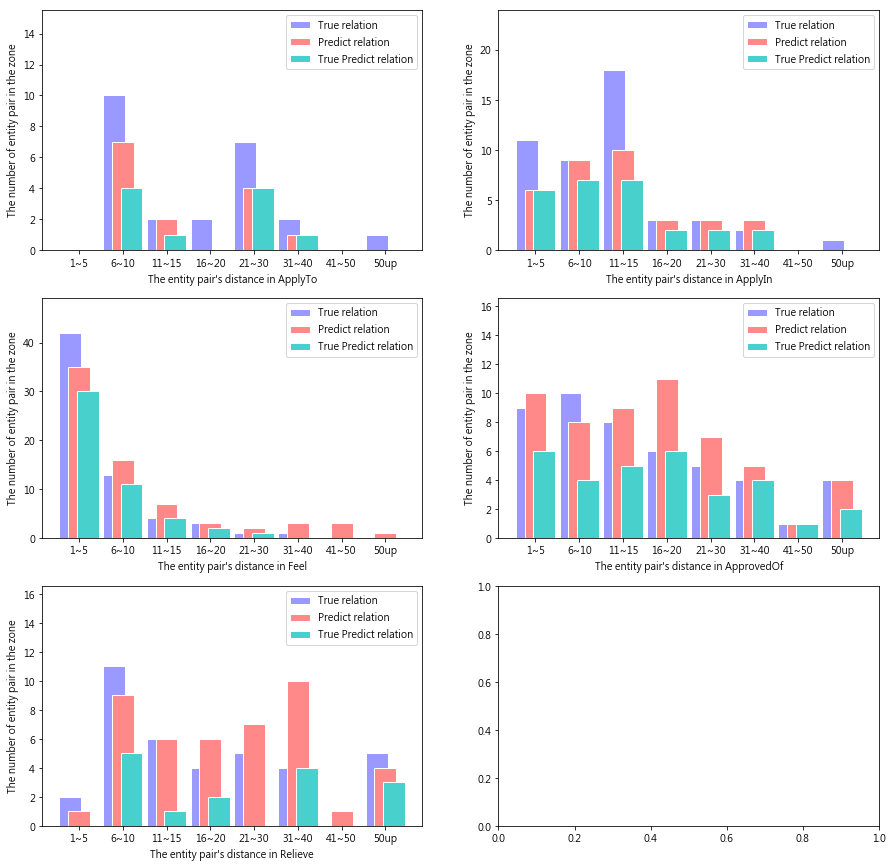

In [8]:
from models import JointERE
e_score, er_score = model.score(dev_loader, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.898 		 0.955 		 0.926 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.699 		 0.557 		 0.62 	
confusion matrix 
TP  	 fp  	 tn  	 fn
204 	 88 	 0 	 162 	

Relation error count: 104

Relation type 0
precision  	 recall  	 fbeta_score  	
0.600 		 0.450 		 0.514 	


Relation type 1
precision  	 recall  	 fbeta_score  	
0.673 		 0.550 		 0.606 	


Relation type 2
precision  	 recall  	 fbeta_score  	
0.712 		 0.752 		 0.732 	


Relation type 3
precision  	 recall  	 fbeta_score  	
0.659 		 0.547 		 0.598 	


Relation type 4
precision  	 recall  	 fbeta_score  	
0.811 		 0.341 		 0.480 	

{'11~15': 10, '21~30': 8, '1~5': 4, '16~20': 4, '6~10': 12, '31~40': 1, '50up': 0, '41~50': 1}
{'11~15': 9, '21~30': 5, '1~5': 3, '16~20': 3, '6~10': 4, '31~40': 3, '50up': 1, '41~50': 2}
{'11~15': 6, '21~30': 4, '1~5': 3, '16~20': 2, '6~10': 2, '31~40': 0, '50up': 0, '41~50': 1}

{'11~15': 11, '21~30': 8, '1~5': 11, '16

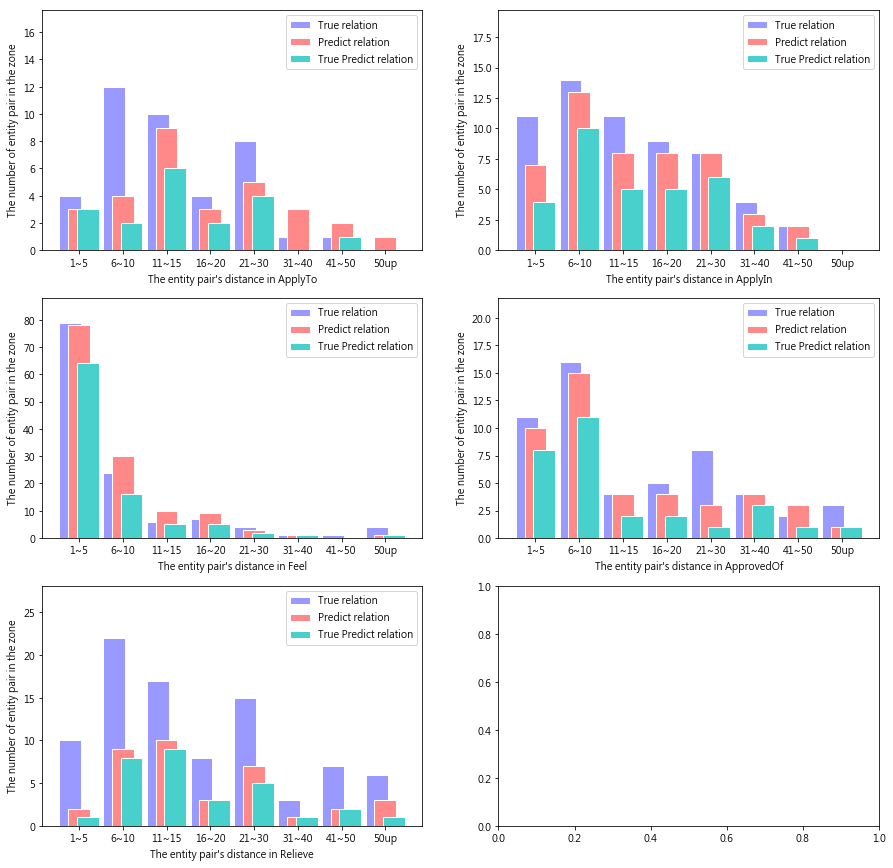

In [9]:
test_loader = BIOLoader(test_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                        word_to_ix=loader.word_to_ix, device=use_device)

e_score, er_score = model.score(test_loader, silent=True, rel_detail=True, analyze=True)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['擦', '上', '後', ',', '肌', '膚', '馬', '上', '可', '以', '立', '即', '感', '受', '到', '很', '水', '潤', '、', '保', '濕', '的', '觸', '感', ';', '又', '有', '玫', '瑰', '果', '油', '、', '接', '骨', '木', '油', '給', '予', '肌', '膚', '滋', '潤', ',', '讓', '皮', '膚', '乾', '燥', '缺', '水', '的', '狀', '況', '可', '以', '改', '善']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['ApplyTo-1-A'], ['ApplyTo-1-A'], '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyTo-1-B'], ['ApplyTo-1-B'], ['ApplyTo-1-B'], ['ApplyTo-1-B'], '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O',

['本', '產', '品', '強', '調', '“', '高', '保', '濕', '“', ',', '接', '下', '來', '就', '來', '看', '看', '它', '的', '保', '濕', '到', '底', '有', '多', '好']
['B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O']
[[], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '']

True
[(0, 2, 2), (20, 21, 3)]
[]
predict
[(0, 2, 2), (20, 21, 3)]
[((0, 2, 2), (20, 21, 3), 3)]
['一', '整', '天', '都', '沒', '有', '再', '補', '妝', ',', '晚', '上', '下', '班', '後', '還', '是', '沒', '什', '麼', '脫', '妝', ',', '這', '款', '粉', 

['用', '了', '本', '產', '品', '臉', '上', '的', '保', '濕', '度', '很', '夠', ',', '不', '會', '有', '乾', '燥', '緊', '繃', '的', '感', '覺', ',', '而', '我', '本', '身', '是', '油', '性', '肌', '膚', ',', '用', '了', '它', '不', '會', '覺', '得', '油', ',', '反', '而', '有', '乾', '爽', '的', '感', '覺', ',', '也', '因', '為', '不', '含', '酒', '精', '成', '酸', '類', '成', '分', ',', '所', '以', '就', '算', '臉', '上', '有', '小', '傷', '口', ',', '也', '不', '會', '有', '刺', '激', '感', ',', '很', '讚']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '

['瓶', '身', '與', '壓', '頭', '大', '小', '剛', '好', '合', '適', '一', '手', '拿', '握', '.', '好', '拿', '好', '握', '且', '方', '便', '食', '指', '按', '壓', '壓', '頭', '.', '按', '壓', '適', '量', '於', '手', '心', '.', '質', '地', '是', '透', '明', '無', '色', '具', '流', '動', '性', '的', '輕', '油', '水', '狀', '.', '帶', '有', '淡', '淡', '的', '清', '心', '花', '香', '味', '道', '.', '香', '味', '清', '新', '淡', '雅', '.', '令', '人', '有', '舒', '緩', '放', '鬆', '的', '感', '覺', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['質', '地', '相', '當', '細', '緻']
['B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B']]

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B']]

True
[(0, 1, 0), (4, 5, 6)]
[((0, 1, 0), (4, 5, 6), 2)]
predict
[(0, 1, 0), (4, 5, 6)]
[((0, 1, 0), (4, 5, 6), 2)]
['但', '是', '如', '果', '在', '冬', '天', '使', '用', '的', '話', '是', '否', '也', '這', '麼', '保', '濕', '就', '要', '再', '觀', '察', '看', '看', '了']
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', '', '', '', 

['因', '我', '冬', '天', '的', '肌', '膚', '非', '常', '的', '乾', '燥', '所', '以', '冬', '天', '使', '用', '保', '濕', '度', '就', '真', '的', '很', '不', '夠']
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', [], [], [], '', '', '', '', '', '']

Predict output
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', [], [], [], '', '', '', '', '', '']

True
[(2, 3, 1), (14, 15, 1), (18, 20, 3)]
[]
predict
[(2, 3, 1), (14, 15, 1), (18, 20, 3)]
[]
['但', '對', '於', '是', '希', '望', '改', '善', '消', '除', '黑', '眼', '圈', '的', '問', '題', ',', '這', '款', '眼', '霜', '的', '效', '果', '就', '不', '那', '麼', '推', '薦', '了']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 

['質', '地', '很', '滑', '潤', '~', '不', '黏', '稠']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
[[], [], '', '', '', '', '', [], []]

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B']]

True
[(0, 1, 0), (7, 8, 6)]
[]
predict
[(0, 1, 0), (7, 8, 6)]
[((0, 1, 0), (7, 8, 6), 2)]
['剛', '收', '到', '這', '罐', '美', '白', '精', '華', '有', '驚', '嘆', '怎', '麼', '可', '以', '賣', '這', '麼', '貴', ',', '到', '底', '是', '有', '多', '有', '效', '果']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '

['我', '臉', '部', '是', '痘', '痘', '肌', ',', '所', '以', '對', '清', '潔', '面', '膜', '非', '常', '的', '喜', '歡', '使', '用', ',', '以', '往', '都', '是', '使', '用', '泥', '狀', '的', ',', '這', '次', '是', '收', '到', '凍', '膜', '狀', '的', '質', '地', ',', '有', '點', '懷', '疑', '可', '以', '深', '層', '清', '潔', '嘛']
['O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['它', '的', '質', '地', '滑', '順', '易', '推', ',', '很', '容', '易', '吸', '收', ',', '用', '量', '只', '需', '一', '點', '點', '就', '可', '以', '用', '滿', '全', '臉', ',', '夏', '天', '整', '天', '都', '在', '吹', '冷', '氣', ',', '本', '來', '我', '的', '皮', '膚', '超', '乾', '的', ',', '臉', '頰', '跟', '嘴', '角', '都', '有', '些', '脫', '皮', '了', '~', '但', '用', '了', '這', '款', '保', '濕', '就', '真', '的', '改', '善', '了', '耶', ',', '很', '好', '用']
['O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['馬', '上', '跑', '出', '來', '.', '不', '然', '就', '是', '會', '發', '紅', '發', '癢', '.', '這', '款', '隔', '離', '霜', '質', '地', '真', '的', '很', '容', '易', '推', '勻', '而', '且', '保', '濕', '相', '當', '夠', '.', '因', '為', '擦', '了']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', ['ApprovedOf-1-A', 'Relieve-0-A'], ['ApprovedOf-1-A', 'Relieve-0-A'], '', '', '', [], [], '', '', '', '', '', '', '', '', '', ['ApprovedOf-1-B'], ['ApprovedOf-1-B'], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O

['這', '款', 'a', 'm', 'p', 'm', '+', 's', 'k', 'i', 'n', 'c', 'a', 'r', 'e', '維', '他', '命', 'A', '極', '效', '青', '春', '毛', '孔', '緊', '提', '素']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['質', '地', '清', '爽', '不', '黏', '膩']
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', [], []]

Predict output
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A', 'Fee

['皮', '膚', '毛', '孔', '有', '細', '緻', '些', ',', '鼻', '頭', '粉', '刺', '用', '這', '瓶', '用', '來', '治', '蠻', '不', '錯', '的']
['O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', ['Relieve-0-B'], ['Relieve-0-B'], '', [], [], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', [], [], '', '', '', '', [], [], '', [], [], '', '', '', '', '', '', '']

True
[(2, 3, 4), (5, 6, 6), (11, 12, 4), (14, 15, 2)]
[]
predict
[(2, 3, 4), (5, 6, 6), (11, 12, 4), (14, 15, 2)]
[]
['保', '濕', '的', '部', '份', '倒', '是', '覺', '得', '還', '可', '以', ',', '是', '有', '感', '覺', '比', '較', 'Q', '彈', '一', '點', ',', '夏', '天', '裡', '開', '冷', '氣', '常', '會', '讓', '皮', '膚', '太', '乾', ',', '但', '擦', '了', '這', '款', '乳', '液', 

['整', '體', '來', '說', '我', '還', '滿', '喜', '歡', '這', '個', '產', '品', '的', ',', '真', '的', '不', '會', '刺', '激', '肌', '膚', ',', '又', '很', '保', '濕']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(9, 12, 2), (26, 27, 3)]
[((9, 12, 2), (26, 27, 3), 3)]
predict
[(9, 12, 2),

['此', '款', '產', '品', '用', '起', '來', ',', '並', '不', '是', '特', '別', '的', '清', '爽', ',', '不', '知', '道', '是', '不', '是', '因', '為', '我', '的', '皮', '膚', '比', '較', '容', '易', '出', '油', '的', '關', '係', ',', '覺', '得', '擦', '在', '臉', '上', '並', '沒', '有', '很', '清', '爽', ',', '反', '而', '有', '點', '黏', '膩', '的', '感', '覺', ',', '也', '覺', '得', '沒', '有', '很', '好', '吸', '收']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [],

['總', '結', '就', '是', '.', '我', '覺', '得', '對', '乾', '肌', '來', '說', '.', '.', '保', '濕', '度', '很', '好', '.', '修', '護', '效', '果', '也', '很', '明', '顯', '的', '產', '品', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', [], [], '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(9, 10, 5), (15, 17, 3)]
[((9, 10, 5), (15, 17, 3), 0)]
predict
[(9, 10, 5)

['不', '過', '這', '瓶', '是', '我', '用', '過', '讓', '後', '續', '保', '養', '吸', '收', '的', '最', '順', '利', '的', '一', '瓶']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 3, 2)]
[]
predict
[(2, 3, 2)]
[]
['按', '壓', '出', '來', '的', '質', '地', '是', '乳', '白', '色', '的', '乳', '液', '狀', ',', '不', '偏', '濃', '不', '偏', '淡']
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'O']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', [], '', '', '']

Predict output
['

['此', '款', '精', '華', '液', '強', '調', '舒', '緩', '功', '能', ',', '所', '以', '對', '於', '較', '敏', '感', '膚', '質', '的', '我', '是', '在', '適', '合', '不', '過', '的', ',']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', ['ApprovedOf-0-B', 'ApplyTo-1-A'], ['ApprovedOf-0-B', 'ApplyTo-1-A'], '', '', '', '', '', '', 

['妝', '效', '的', '確', '有', '比', '較', '持', '久', ',', '控', '油', '效', '果', '蠻', '好', '的', ',', '我', '是', 'T', '字', '部', '位', '跟', '額', '頭', '出', '油', '的', '很', '厲', '害', ',', '脫', '妝', '也', '脫', '的', '最', '快', ',', '不', '過', '用', '了', '這', '個', '產', '品', '可', '以', '多', '撐', '個', '兩', '到', '三', '鐘', '頭', ',', '脫', '妝', '以', '後', '看', '起', '來', '是', '比', '較', '自', '然', ',', '不', '會', '像', '以', '前', '糊', '的', '亂', '七', '八', '糟', ',', '很', '醜']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'

[((16, 17, 3), (47, 48, 1), 1)]
predict
[(8, 9, 2), (16, 17, 3), (47, 48, 1)]
[((8, 9, 2), (16, 17, 3), 3), ((16, 17, 3), (47, 48, 1), 1)]
['這', '次', '試', '用', '的', '商', '品', '是', 'R', 'M', 'K', '高', '效', '煥', '膚', '修', '護', '凝', '霜', ',', '這', '款', '商', '品', '的', '主', '打', '提', '升', '肌', '膚', '潤', '澤', '度', '、', '保', '濕', ',', '成', '分', '含', '有', 'R', 'M', 'K', '保', '養', '系', '列', '共', '通', '美', '容', '成', '分', '橙', '皮', '菁', '華', '及', '藍', '莓', '葉', '菁', '華', ',', '此', '外', '還', '有', '維', '他', '命', 'B', '3', '、', '維', '他', '命', 'E', '等', '成', '分', '防', '止', '肌', '膚', '粗', '糙']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

['抗', '痘', '的', '話', '室', '還', '蠻', '不', '錯', '的', ',', '悶', '熱', '的', '天', '氣', '很', '容', '易', '阻', '塞', '毛', '孔', '長', '痘', '痘', ',', '用', '這', '罐', '2', '個', '禮', '拜', '的', '期', '間', '也', '只', '長', '了', '一', '顆', '痘', '痘', '唷']
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', [], [], '', '', ['Relieve-1-A'], ['Relieve-1-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-1-B'], ['Relieve-1-B'], '']

Predict output
['B-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O

['這', '款', '修', '飾', '乳', '對', '於', '斑', '點', '、', '痘', '痘', '好', '像', '沒', '啥', '修', '飾', '效', '果', '>', '"', '<']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (10, 11, 4)]
[]
predict
[(0, 1, 2), (10, 11, 4)]
[((0, 1, 2), (10, 11, 4), 4)]
['這', '款', '修', '飾', '乳', '是', '真', '的', '很', '好', '推', '抹', ',', '且', '抑', '制', '油', '光', '非', '常', '夠', '力', ',', '不', '過', '在', '修', '飾', '方', '面', '就', '略', '顯', '不', '足', ',', '只', '能', '修', '飾', '毛', '孔', ',', '其', '他', '班', '班', '點', '點', '、', '痘', '疤', 

['這', '款', '是', '偏', '向', '緊', '緻', '的', '~', '我', '自', '己', '覺', '得', '緊', '緻', '這', '種', '東', '西', '單', '擦', '其', '實', '效', '果', '並', '不', '是', '很', '明', '顯', ',', '還', '是', '需', '要', '搭', '配', '一', '些', '按', '摩', '才', '可', '以', '看', '到', '效', '果', ',', '不', '過', '雖', '然', '質', '地', '上', '來', '說', '偏', '稀', ',', '但', '保', '濕', '還', '不', '錯', '耶']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [

['這', '瓶', '綠', '色', '包', '裝', ',', '裡', '頭', '有', '添', '加', '和', '漢', '植', '物', '成', '份', ',', '使', '用', '起', '來', '有', '收', '斂', '粗', '大', '毛', '孔', '的', 'F', 'U', ',']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '']

True
[(0, 1, 2), (28, 29, 4)]
[((0, 1, 2), (28, 29, 4), 4)]
predict
[(0, 1, 2), (28, 29, 4)]
[]
['濕', '敷

['這', '款', '妝', '前', '霜', '強', '調', '的', '是', ':', '遮', '蔽', '小', '細', '紋', '~', '毛', '孔', '~', '讓', '粉', '底', '更', '服', '貼', '.', '.', '.', '等', '等']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', [], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-1-A', 'Relieve-0-A'], ['Relieve-1-A', 'Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', ['Relieve-1-B'], ['Relieve-1-B'], '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (13, 14, 4), (16, 17, 4)]
[]
predict
[(0, 1, 2), (13, 14, 4), (16, 17, 4)]
[((0, 1, 2), (13, 14, 4), 4)

['夏', '季', '時', '兩', '頰', '略', '乾', 'T', '字', '極', '油', ',', '不', '認', '真', '做', '好', '保', '濕', '的', '話', '常', '常', '晚', '上', '妝', '都', '浮', '到', '細', '毛', '上', '了']
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 1)]
[]
predict
[(0, 1, 1)]
[]
['保', '濕', '度', '普', '通', ',', '對', '於', '個', '人', '的', '乾', '性', '皮', '膚', '並', '沒', '有', '感', '覺', '較', '保', '濕']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O',

['雖', '然', '有', '保', '濕', '效', '果', ',', '但', '是', '對', '過', '敏', '膚', '質', '並', '沒', '有', '任', '何', '幫', '助']
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', [], [], [], [], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '']

True
[(3, 4, 3), (11, 14, 5)]
[]
predict
[(3, 4, 3), (11, 14, 5)]
[((3, 4, 3), (11, 14, 5), 0)]
['我', '覺', '得', '它', '很', '好', '用', ',', '而', '且', '價', '格', '不', '貴', ',', '夏', '天', '要', '來', '了', ',', '擦', '在', '身', '上', '可', '美', '白', '又', '保', '濕', ',', '是', '一', '個', '很', '好', '的', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', '

['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B']]

True
[(5, 6, 0), (9, 11, 6)]
[((5, 6, 0), (9, 11, 6), 2)]
predict
[(5, 6, 0), (9, 11, 6)]
[((5, 6, 0), (9, 11, 6), 2)]
['產', '品', '質', '地', '是', '透', '明', '水', '狀', ',']
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

Predict output
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

True
[(2, 3, 0), (7, 8, 6)]
[((2, 3, 0), (7, 8, 6), 2)]
predict
[(2, 3, 0), (7, 8, 6)]
[((2, 3, 0), (7, 8, 6), 2)]
['此', '

['真', '期', '待', '夏', '天', '來', '使', '用', '這', '款', '吸', '收', '快', '味', '道', '淡', '雅', '的', '美', '白', '+', '保', '濕', '的', '精', '華', '液']
['O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', ['ApprovedOf-1-A', 'ApprovedOf-2-A'], ['ApprovedOf-1-A', 'ApprovedOf-2-A'], '', '', '', ['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', ['ApprovedOf-1-B'], ['ApprovedOf-1-B'], '', ['ApprovedOf-2-B'], ['ApprovedOf-2-B'], '', '', '', '']

Predict output
['O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', ['ApplyIn-2-B', 'ApplyIn-1-B'], ['ApplyIn-2-B', 'ApplyIn-1-B'], '', '', '', [], [], '', '', '', ['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', '', ''

['針', '對', '這', '款', '產', '品', '評', '鑑', '的', '4', '種', '功', '效', ':', '保', '濕', '、', '改', '善', '細', '紋', '、', '白', '皙', '、', '緊', '緻']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', [], [], [], [], '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', [], []]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['Relieve-1-A', 'ApprovedOf-0-A', 'ApprovedOf-2-A'], ['Relieve-1-A', 'ApprovedOf-0-A', 'ApprovedOf-2-A'], ['Relieve-1-A', 'ApprovedOf-0-A', 'ApprovedOf-2-A'], ['Relieve-1-A', 'ApprovedOf-0-A', 'ApprovedOf-2-A'], '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', ['Relieve-1-B'], ['Relieve-1-B'], '', '', '', '', ['ApprovedOf

['很', '喜', '歡', '本', '產', '品', '清', '爽', '不', '黏', '膩', '的', '感', '覺', '很', '適', '合', '敏', '感', '性', '膚', '質', '的', '我', '對', '兩', '頰', '的', '保', '濕', '效', '果', '很', '好', '但', '對', '於', '原', '本', '鼻', '子', '兩', '側', '乾', '癢', '的', '狀', '況', '及', '消', '除', '細', '紋', '並', '無', '太', '大', '改', '善', '整', '體', '來', '說', '是', '個', '保', '濕', '性', '良', '好', '的', '產', '品']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], [], [], '', [], [], '', '', '', '', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '

['整', '體', '來', '說', '我', '覺', '得', '以', '秋', '天', '來', '說', '是', '還', '算', '不', '錯', '的', '保', '濕', '產', '品', '喔']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', [], [], '', '', '']

True
[(8, 9, 1), (18, 19, 3)]
[((8, 9, 1), (18, 19, 3), 1)]
predict
[(8, 9, 1), (18, 19, 3)]
[]
['使', '用', '後', '很', '快', '就', '吸', '收', '了', ',', '清', '爽', '不', '黏', '膩', ',', '使', '用', '後', '肌', '膚', '柔', '滑', '有', '光', '澤', ',', '保', '濕', '度', '很', '持', '久', ',', '有', '淡', '淡', '的', '香', '氣', '我', '喜', '歡', ',', '大', '致', '上', '來', '說', '是', '不', '錯', 

['對', '美', '白', '產', '品', '的', '印', '象', '其', '實', '跟', '保', '濕', '有', '些', '相', '違', '背', ',', '不', '過', '這', '款', '產', '品', '的', '保', '濕', '程', '度', '滿', '出', '乎', '意', '料', '的', '好']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', ['ApprovedOf-0-A

['倒', '是', '有', '感', '受', '到', '肌', '膚', '保', '濕', '度', ',', '現', '在', '是', '冬', '天', ',', '塗', '過', '本', '產', '品', '後', ',', '上', '妝', '確', '實', '較', '容', '易', '.', '至', '於', '透', '亮', '的', '效', '果', '.', '.', '.', '嗯', '.', '.', '因', '為', '我', '皮', '膚', '蠻', '黝', '黑', '的', ',', '所', '以', '.', '.', '.', '實', '在', '無', '法', '區', '分', '透', '亮', '感', '.', ' ', '吸', '收', '度', '不', '錯', '喔']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['乾', '肌', '我', '本', '人', ',', '在', '化', '妝', '水', '+', '乳', '霜', '晨', '間', '保', '養', '完', '後', ',', '直', '接', '塗', '抹', '這', '瓶', '防', '曬', '乳', '當', '作', '妝', '前', '飾', '底', '乳']
['B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 5), (24, 25, 2)]
[]
predict
[(0, 0, 5), (24, 25, 2)]
[]
['美', '肌', '醫', '生', '這', '瓶', '玻', '尿', '酸', 

['淡', '淡', '的', '香', '味', '很', '舒', '服', '質', '地', '延', '展', '性', '不', '錯', '也', '不', '會', '太', '黏', '膩', '不', '過', '保', '溼', '度', '來', '說', '適', '合', '冬', '天', '的', '早', '上', '保', '養', '晚', '上', '可', '能', '不', '夠', '保', '濕', '用', '了', '一', '個', '月', '覺', '得', '膚', '色', '滿', '明', '亮', '的']
['O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-SEN

['很', '好', ',', '減', '少', '細', '紋', '出', '現', '是', '我', '對', '這', '瓶', '最', '大', '的', '期', '待']
['O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '']

True
[(5, 6, 4), (12, 13, 2)]
[]
predict
[(5, 6, 4), (12, 13, 2)]
[]
['想', '說', '對', '於', '我', '冬', '天', '超', '級', '乾', '的', '臉', '保', '濕', '效', '果', '真', '的', '足', '夠', '嗎']
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O'

['因', '為', '我', '臉', '部', '有', '膚', '色', '不', '均', '、', '痘', '疤', '、', '毛', '孔', '粗', '大', '問', '題', ',', '上', '了', '這', '款', 'C', 'C', '霜', '明', '顯', '的', '修', '飾', '了', '臉', '部', '的', '膚', '色', '、', '痘', '疤', '、', '毛', '孔', '問', '題', ',', '讓', '膚', '質', '看', '起', '來', '細', '緻', '許', '多']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', ['Relieve-1-A', 'Relieve-0-A'], ['Relieve-1-A', 'Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-1-B'], ['Relieve-1-B'], '', '', '', '', '', '', '', '', '', [], [], '', '']

Predict output
['O', 'O', 'O', 'O', 

['擦', '在', '臉', '上', '只', '有', '感', '覺', '到', '舒', '服', ',', '真', '的', '是', '一', '款', '春', '夏', '換', '季', '及', '夏', '天', '冷', '氣', '房', '中', '不', '可', '或', '缺', '的', '保', '濕', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '']

True
[(22, 23, 1), (33, 34, 3)]
[((

['產', '品', '遮', '瑕', '度', ':', '這', '款', '對', '於', '遮', '瑕', '度', '不', '太', '夠', ',', '上', '完', '後', ',', '發', '現', '有', '痘', '疤', '跟', '小', '斑', '點', '的', '地', '方', '還', '是', '有', '點', '明', '顯', ',', '但', '對', '於', '毛', '孔', '的', '遮', '瑕', '還', '算', '可', '以']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['精', '華', '液', '的', '質', '地', '很', '清', '爽', ',', '很', '快', '就', '吸', '收', '進', '去', '了', ',']
['O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '']

True
[(4, 5, 0), (7, 8, 6)]
[((4, 5, 0), (7, 8, 6), 2)]
predict
[(4, 5, 0), (7, 8, 6)]
[((4, 5, 0), (7, 8, 6), 2)]
['使', '用', '這', '瓶', '後', '對', '於', '精', '華', '液', '有', '改', '觀', ',', '不', '會', '讓', '我', '皮', '膚', '長', '豆', '芽', ',', '吸', '收', '度', '又', '好', ',', '手', '心', '不', '再', '油', '膩', '膩', ',', '且', '到', '了', '早', '上', '還', '是', '有', '保', '濕', '的', '感', '覺', ',', '也', '不', '會', '冒', '油']
['O', 'O', 'B-PROD',

['試', '用', '期', '間', '剛', '好', '朋', '友', '去', '日', '本', '玩', ',', '除', '了', '向', '朋', '友', '推', '廌', '這', '款', '產', '品', ',', '還', '順', '便', '請', '朋', '友', '幫', '忙', '買', '補', '充', '包', ',', '連', '同', '系', '列', '的', '化', '妝', '水', '跟', '保', '濕', '美', '容', '液', '都', '一', '起', '帶']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['3', '、', '秋', '天', '的', '太', '陽', '並', '沒', '有', '比', '夏', '天', '客', '氣', ',', '一', '樣', '熱', '得', '讓', '人', '溶', '妝', ',', '因', '此', '在', '粉', '餅', '的', '選', '擇', '上', '控', '油', '、', '抗', '汗', '、', '抗', '暗', '沈', '等', '高', '持', '妝', '力', '訴', '求', '是', '最', '重', '要', '的']
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['保', '濕', '度', '很', '不', '錯', ',', '一', '般', '冬', '天', '我', '都', '要', '加', '乳', '霜', '保', '濕', ',']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', [], [], '']

Predict output
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-FUNC', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', [], '']

True
[(0, 2, 3), (9, 10, 1), (17, 18, 3)]
[((0, 2, 3), (9, 10, 1), 1)]
predict
[(0, 2, 3), (9, 10, 1)]
[((0, 2, 3), (9, 10, 1), 1)]
['他', '主', '打', '的', '持', '妝', '力', '真', '的', '沒', '話', '說', ',', '我', '帶', '妝', '1', '2', '小', '時', '只', '有', '臉', '頰', '稍', '微', '浮', '粉', ',', 'T', '字', '部', '位', '稍', '微', '出', '油', ',', 

['膚', '蕊', '這', '罐', '保', '濕', '凝', '膠', '很', '特', '別']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '']

True
[(2, 3, 2)]
[]
predict
[(2, 3, 2)]
[]
['味', '道', '很', '天', '然', ';', '無', '添', '加', '的', '很', '清', '新', '自', '然', ',', '聞', '起', '來', '很', '舒', '服', ';', '不', '刺', '鼻']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', ['F

{'11~15': 4, '21~30': 1, '1~5': 42, '16~20': 3, '6~10': 13, '31~40': 1, '50up': 0, '41~50': 0}
{'11~15': 7, '21~30': 2, '1~5': 35, '16~20': 3, '6~10': 16, '31~40': 3, '50up': 1, '41~50': 3}
{'11~15': 4, '21~30': 1, '1~5': 30, '16~20': 2, '6~10': 11, '31~40': 0, '50up': 0, '41~50': 0}

{'11~15': 8, '21~30': 5, '1~5': 9, '16~20': 6, '6~10': 10, '31~40': 4, '50up': 4, '41~50': 1}
{'11~15': 8, '21~30': 8, '1~5': 10, '16~20': 11, '6~10': 8, '31~40': 5, '50up': 3, '41~50': 1}
{'11~15': 5, '21~30': 3, '1~5': 6, '16~20': 6, '6~10': 4, '31~40': 4, '50up': 1, '41~50': 1}

{'11~15': 6, '21~30': 5, '1~5': 2, '16~20': 4, '6~10': 11, '31~40': 4, '50up': 5, '41~50': 0}
{'11~15': 8, '21~30': 7, '1~5': 1, '16~20': 7, '6~10': 10, '31~40': 10, '50up': 6, '41~50': 1}
{'11~15': 1, '21~30': 0, '1~5': 0, '16~20': 3, '6~10': 5, '31~40': 4, '50up': 3, '41~50': 0}



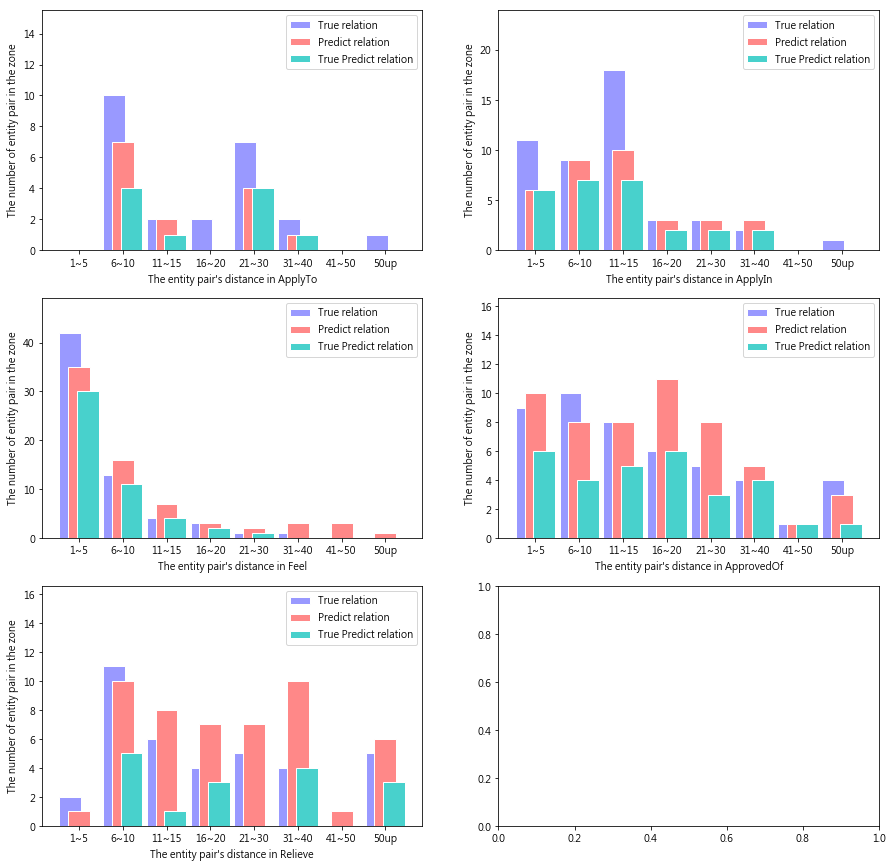

In [10]:
e_score, er_score = model.score(dev_loader, isTrueEnt=True, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.898 		 0.955 		 0.926 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.706 		 0.557 		 0.623 	
confusion matrix 
TP  	 fp  	 tn  	 fn
204 	 85 	 0 	 162 	

Relation error count: 106

Relation type 0
precision  	 recall  	 fbeta_score  	
0.621 		 0.450 		 0.522 	


Relation type 1
precision  	 recall  	 fbeta_score  	
0.660 		 0.550 		 0.600 	


Relation type 2
precision  	 recall  	 fbeta_score  	
0.710 		 0.744 		 0.727 	


Relation type 3
precision  	 recall  	 fbeta_score  	
0.682 		 0.566 		 0.619 	


Relation type 4
precision  	 recall  	 fbeta_score  	
0.857 		 0.341 		 0.488 	

{'11~15': 10, '21~30': 8, '1~5': 4, '16~20': 4, '6~10': 12, '31~40': 1, '50up': 0, '41~50': 1}
{'11~15': 9, '21~30': 5, '1~5': 3, '16~20': 3, '6~10': 3, '31~40': 3, '50up': 1, '41~50': 2}
{'11~15': 6, '21~30': 4, '1~5': 3, '16~20': 2, '6~10': 2, '31~40': 0, '50up': 0, '41~50': 1}

{'11~15': 11, '21~30': 8, '1~5': 11, '1

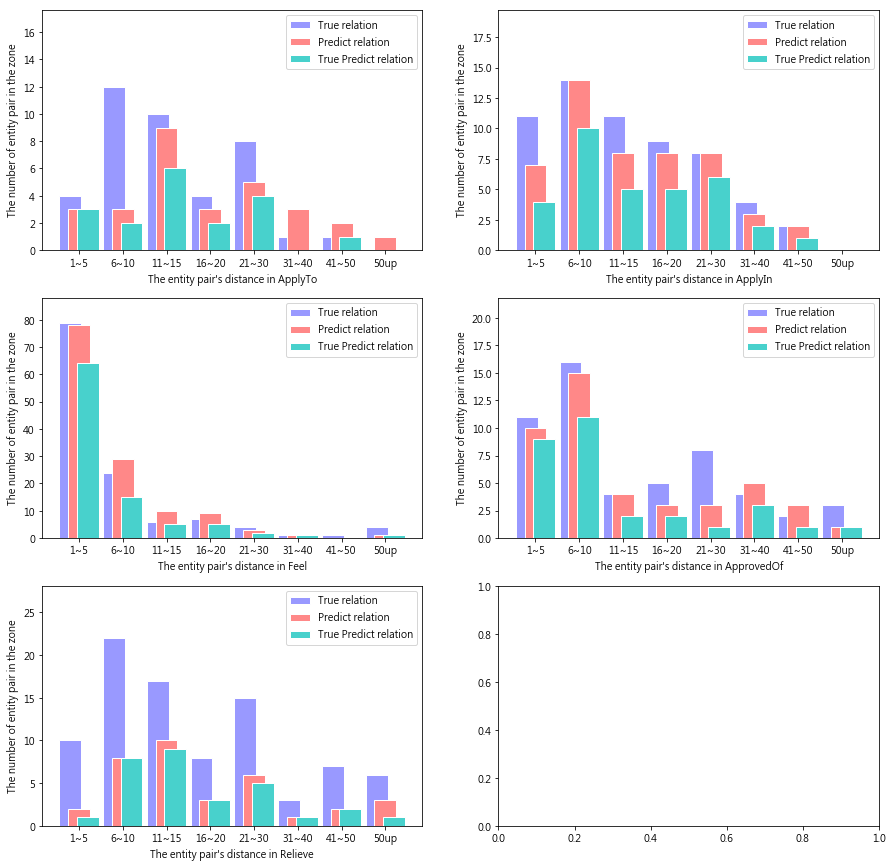

In [11]:
e_score, er_score = model.score(test_loader, isTrueEnt=True, silent=True, rel_detail=True, analyze=True)